### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import rdkit 

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
savepath = "F01_new_machine_benchmarking/"
os.makedirs(savepath, exist_ok=True)

In [4]:
df = pd.read_excel("/Users/michaelmoret/tinyverse/krap/data/pulling_new_machine_benchmark/20240910_DAN_NK_bleached_100hairs_tensile.xlsx", 
                 skiprows=2)
df.head(3)

,RECORD,CROSS-SECTIONAL AREA,Unnamed: 2,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,BREAK STRESS.1,TOTAL WORK,TOUGHNESS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,sq. microns,NaN,Microns,Microns,Microns,Pascals,gmf/mm,% Strain,gmf/sq micron,...,gmf/sq micron,Joules,% Strain,gmf/mm,% Strain,gmf,gmf/sq micron,MPa,Joules,Joules/m3
2,1,2927.5,0.002927,61.4,67.2,55.5,3768000000,37.26,2.58,0.01059,...,0.01308,0.00252,36.18,2.121,69.81,69.35,0.02369,232.319538,0.009855,111500000


In [5]:
df = df.drop([0, 1]).reset_index(drop=True)
df.head(3)

,RECORD,CROSS-SECTIONAL AREA,Unnamed: 2,MEAN DIAMETER,MAX DIAMETER,MIN DIAMETER,ELASTIC EMOD,ELASTIC GRADIENT,ELASTIC EXT,ELASTIC STRESS,...,STRESS 25%,WORK 25%,YIELD EXT,POSTYIELD GRADIENT,BREAK EXT,BREAK LOAD,BREAK STRESS,BREAK STRESS.1,TOTAL WORK,TOUGHNESS
0,1,2927.5,0.002927,61.4,67.2,55.5,3768000000,37.26,2.58,0.01059,...,0.01308,0.00252,36.18,2.121,69.81,69.35,0.02369,232.319538,0.009855,111500000
1,2,3555.4,0.003555,71.4,87.6,51.7,3813000000,45.89,2.82,0.01226,...,0.01301,0.003143,28.2,3.399,53.57,74.35,0.02091,205.057052,0.008261,77170000
2,3,3556.1,0.003556,69.6,80,56.6,3741000000,44.85,2.88,0.01264,...,0.01336,0.003231,27.65,3.329,52.4,73.95,0.0208,203.97832,0.008181,76100000


In [6]:
len(df)

105

In [7]:
print(df.columns)

Index(['RECORD', 'CROSS-SECTIONAL AREA', 'Unnamed: 2', 'MEAN DIAMETER',
       'MAX DIAMETER', 'MIN DIAMETER', 'ELASTIC EMOD', 'ELASTIC GRADIENT',
       'ELASTIC EXT', 'ELASTIC STRESS', 'PLATEAU LOAD', 'PLATEAU STRESS',
       'LOAD 15%', 'STRESS 15%', 'WORK 15%', 'LOAD 25%', 'STRESS 25%',
       'WORK 25%', 'YIELD EXT', 'POSTYIELD GRADIENT', 'BREAK EXT',
       'BREAK LOAD', 'BREAK STRESS', 'BREAK STRESS.1', 'TOTAL WORK',
       'TOUGHNESS'],
      dtype='object')


In [8]:
df_bio = df[['BREAK STRESS']]
df_bio.head(3)

,BREAK STRESS
0,0.02369
1,0.02091
2,0.0208


In [9]:
df_bio = df_bio.dropna()
len(df_bio)

99

### Break stress

In [10]:
all_samples = list(df_bio['BREAK STRESS'])
all_samples[:2]

[0.02369, 0.02091]

In [11]:
from scipy.stats import ks_2samp

N_REPEATS = 100
d_n_pvalues = {}
for n in range(10, 100, 1):
    for nr in range(N_REPEATS):
        sampled_values = np.random.choice(all_samples, n)
        res = ks_2samp(all_samples, sampled_values, alternative='two-sided', mode='auto')
        # get the p-value
        p_value = res[1]
        if n not in d_n_pvalues:
            d_n_pvalues[n] = []
        d_n_pvalues[n].append(round(p_value,4))
len(d_n_pvalues)

90

In [12]:
mean_pvalues = []
std_values = []
for i in range(10, 100, 1):
    mean_pvalues.append(np.mean(d_n_pvalues[i]))
    std_values.append(np.std(d_n_pvalues[i]))

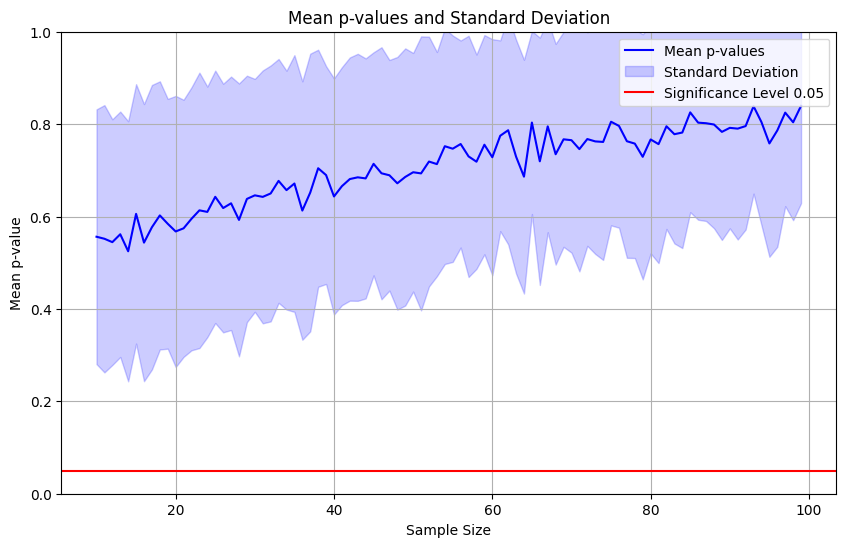

In [13]:
# Plotting the mean and standard deviation
x = range(10, 100)
mean_pvalues = np.array(mean_pvalues)
std_values = np.array(std_values)

plt.figure(figsize=(10, 6))
plt.plot(x, mean_pvalues, label='Mean p-values', color='blue')
plt.fill_between(x, mean_pvalues - std_values, mean_pvalues + std_values, color='blue', alpha=0.2, label='Standard Deviation')
plt.xlabel('Sample Size')
plt.ylabel('Mean p-value')
plt.title('Mean p-values and Standard Deviation')
plt.ylim(0, 1.0)
# add a red line at 0.05
plt.axhline(y=0.05, color='r', linestyle='-', label='Significance Level 0.05')
plt.legend()
plt.grid(True)
plt.show()

let's look at the minimum p values 

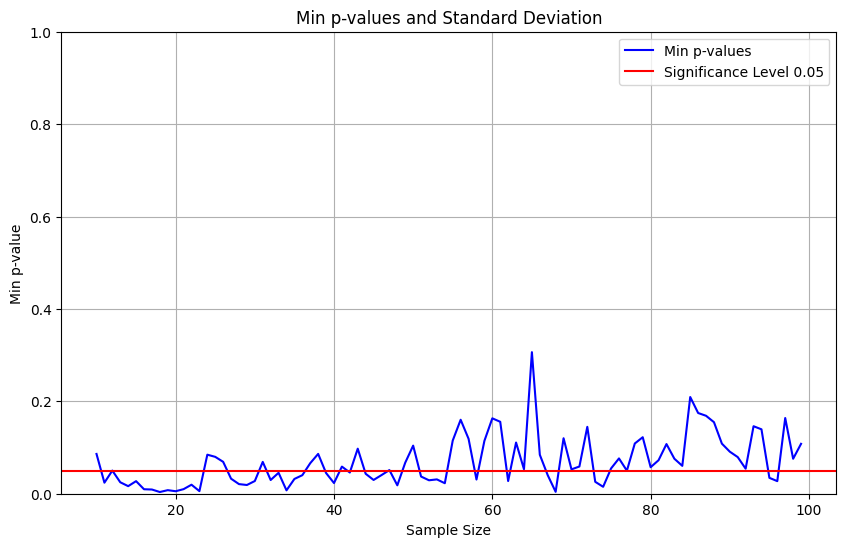

In [14]:
min_pvalues = []
for i in range(10, 100, 1):
    min_pvalues.append(np.min(d_n_pvalues[i]))

# Plotting the mean and standard deviation
x = range(10, 100)
min_pvalues = np.array(min_pvalues)

plt.figure(figsize=(10, 6))
plt.plot(x, min_pvalues, label='Min p-values', color='blue')
plt.xlabel('Sample Size')
plt.ylabel('Min p-value')
plt.title('Min p-values and Standard Deviation')
plt.ylim(0, 1.0)
plt.axhline(y=0.05, color='r', linestyle='-', label='Significance Level 0.05')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
percent_ok = []
THRES = 0.05
for i in range(10, 100, 1):
    values = d_n_pvalues[i]
    count = len([v for v in values if v > THRES])
    percent_ok.append(count / len(values))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


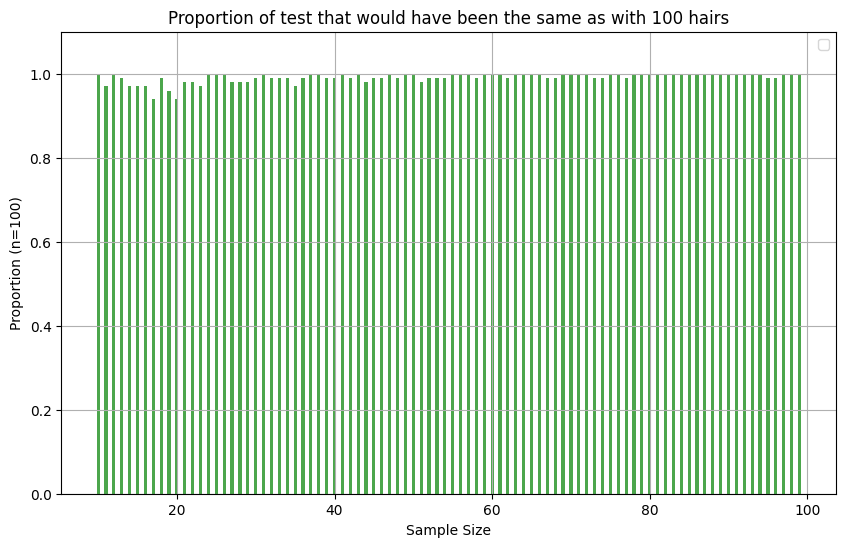

In [16]:
# Plotting the percent_ok as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(10, 100), percent_ok, color='green', alpha=0.7, width=0.4)
plt.xlabel('Sample Size')
plt.ylabel(f'Proportion (n={N_REPEATS})')
plt.title('Proportion of test that would have been the same as with 100 hairs')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

P-value of Kolmogorov-Smirnov test:
- two-sided: the null hypothesis is that the two distributions are the same   
--> If the KS statistic is large, then the p-value will be small, and this may be taken as evidence against the null hypothesis in favor of the alternative.

### let's looks at medians

In [17]:
N_REPEATS = 42
d_n_medians = {}
for n in range(10, 100, 1):
    for nr in range(N_REPEATS):
        sampled_values = np.random.choice(all_samples, n)
        median = round(np.median(sampled_values),4)
        if n not in d_n_medians:
            d_n_medians[n] = []
        d_n_medians[n].append(median)
len(d_n_medians)

90

In [18]:
round(np.median(all_samples),4)

0.0212

In [19]:
for i in range(10, 100, 1):
    print(i, round(np.median(d_n_medians[i]),4), round(np.std(d_n_medians[i]),4))

10 0.0214 0.0006
11 0.0209 0.0007
12 0.0217 0.0008
13 0.0212 0.0008
14 0.0215 0.0005
15 0.0212 0.0008
16 0.0212 0.0005
17 0.0211 0.0005
18 0.0215 0.0006
19 0.0211 0.0007
20 0.0213 0.0005
21 0.0212 0.0005
22 0.0212 0.0005
23 0.0211 0.0005
24 0.0214 0.0004
25 0.0212 0.0006
26 0.0212 0.0005
27 0.0212 0.0005
28 0.021 0.0005
29 0.0212 0.0006
30 0.0214 0.0005
31 0.0212 0.0005
32 0.0212 0.0004
33 0.0213 0.0005
34 0.0212 0.0005
35 0.0212 0.0004
36 0.0212 0.0005
37 0.0212 0.0005
38 0.0212 0.0005
39 0.0212 0.0004
40 0.0212 0.0004
41 0.0213 0.0005
42 0.0212 0.0004
43 0.0212 0.0004
44 0.0213 0.0004
45 0.0212 0.0005
46 0.0213 0.0004
47 0.0212 0.0004
48 0.0213 0.0003
49 0.0212 0.0004
50 0.0214 0.0004
51 0.0212 0.0005
52 0.0213 0.0004
53 0.0213 0.0004
54 0.0212 0.0003
55 0.0213 0.0004
56 0.0212 0.0004
57 0.0212 0.0004
58 0.0212 0.0003
59 0.0213 0.0004
60 0.0212 0.0004
61 0.0212 0.0004
62 0.0212 0.0003
63 0.0212 0.0004
64 0.0212 0.0004
65 0.0212 0.0003
66 0.0212 0.0004
67 0.0213 0.0004
68 0.0211 0.000